In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams
from matplotlib import ticker
rcParams["figure.figsize"] = (10,8)
plt.style.use("science")
import eispac
from glob import glob
import sunpy
import cmcrameri.cm as cmcm
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy import interpolate
rcParams['xtick.major.width'] = 1.2
rcParams['xtick.major.size'] = 6
rcParams['xtick.minor.width'] = 1.2
rcParams['xtick.minor.size'] = 4
rcParams['ytick.major.width'] = 1.2
rcParams['ytick.major.size'] = 6
rcParams['ytick.minor.width'] = 1.2
rcParams['ytick.minor.size'] = 4
rcParams['axes.linewidth'] = 2
rcParams['text.latex.preamble'] = r'\usepackage[T1]{fontenc} \usepackage{amsmath}'

In [2]:
fe_10_184_fit_files = glob("../save/eis_fit/*fe_10_184*")
fe_10_184_fit_files = sorted(fe_10_184_fit_files)
fe_10_184_fit_files

['../save/eis_fit/eis_20070331_113427.fe_10_184_536.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_121143.fe_10_184_536.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_124913.fe_10_184_536.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_132643.fe_10_184_536.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_153013.fe_10_184_536.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_160743.fe_10_184_536.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_164513.fe_10_184_536.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_172243.fe_10_184_536.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_182413.fe_10_184_536.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_190143.fe_10_184_536.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_195513.fe_10_184_536.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_203243.fe_10_184_536.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_213213.fe_10_184_536.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_220943.fe_10_184_536.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_230743.fe_10_184_536.1c-0.fit.h5']

In [3]:
fe_10_257_fit_files = glob("../save/eis_fit/*fe_10_257*")
fe_10_257_fit_files = sorted(fe_10_257_fit_files)
fe_10_257_fit_files

['../save/eis_fit/eis_20070331_113427.fe_10_257_262.4c-1.fit.h5',
 '../save/eis_fit/eis_20070331_121143.fe_10_257_262.4c-1.fit.h5',
 '../save/eis_fit/eis_20070331_124913.fe_10_257_262.4c-1.fit.h5',
 '../save/eis_fit/eis_20070331_132643.fe_10_257_262.4c-1.fit.h5',
 '../save/eis_fit/eis_20070331_153013.fe_10_257_262.4c-1.fit.h5',
 '../save/eis_fit/eis_20070331_160743.fe_10_257_262.4c-1.fit.h5',
 '../save/eis_fit/eis_20070331_164513.fe_10_257_262.4c-1.fit.h5',
 '../save/eis_fit/eis_20070331_172243.fe_10_257_262.4c-1.fit.h5',
 '../save/eis_fit/eis_20070331_182413.fe_10_257_262.4c-1.fit.h5',
 '../save/eis_fit/eis_20070331_190143.fe_10_257_262.4c-1.fit.h5',
 '../save/eis_fit/eis_20070331_195513.fe_10_257_262.4c-1.fit.h5',
 '../save/eis_fit/eis_20070331_203243.fe_10_257_262.4c-1.fit.h5',
 '../save/eis_fit/eis_20070331_213213.fe_10_257_262.4c-1.fit.h5',
 '../save/eis_fit/eis_20070331_220943.fe_10_257_262.4c-1.fit.h5',
 '../save/eis_fit/eis_20070331_230743.fe_10_257_262.4c-1.fit.h5']

In [4]:
mg_7_276_fit_files = glob("../save/eis_fit/*mg_07_276*")
mg_7_276_fit_files = sorted(mg_7_276_fit_files)
mg_7_276_fit_files

['../save/eis_fit/eis_20070331_113427.mg_07_276_153.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_121143.mg_07_276_153.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_124913.mg_07_276_153.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_132643.mg_07_276_153.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_153013.mg_07_276_153.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_160743.mg_07_276_153.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_164513.mg_07_276_153.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_172243.mg_07_276_153.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_182413.mg_07_276_153.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_190143.mg_07_276_153.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_195513.mg_07_276_153.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_203243.mg_07_276_153.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_213213.mg_07_276_153.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_220943.mg_07_276_153.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_230743.mg_07_276_153.1c-0.fit.h5']

In [5]:
mg_7_280_fit_files = glob("../save/eis_fit/*mg_07_280*")
mg_7_280_fit_files = sorted(mg_7_280_fit_files)
mg_7_280_fit_files

['../save/eis_fit/eis_20070331_113427.mg_07_280_737.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_121143.mg_07_280_737.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_124913.mg_07_280_737.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_132643.mg_07_280_737.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_153013.mg_07_280_737.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_160743.mg_07_280_737.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_164513.mg_07_280_737.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_172243.mg_07_280_737.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_182413.mg_07_280_737.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_190143.mg_07_280_737.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_195513.mg_07_280_737.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_203243.mg_07_280_737.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_213213.mg_07_280_737.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_220943.mg_07_280_737.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_230743.mg_07_280_737.1c-0.fit.h5']

In [6]:
si_10_258_fit_files = glob("../save/eis_fit/*si_10_258*")
si_10_258_fit_files = sorted(si_10_258_fit_files)
si_10_258_fit_files

['../save/eis_fit/eis_20070331_113427.si_10_258_375.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_121143.si_10_258_375.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_124913.si_10_258_375.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_132643.si_10_258_375.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_153013.si_10_258_375.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_160743.si_10_258_375.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_164513.si_10_258_375.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_172243.si_10_258_375.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_182413.si_10_258_375.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_190143.si_10_258_375.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_195513.si_10_258_375.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_203243.si_10_258_375.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_213213.si_10_258_375.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_220943.si_10_258_375.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_230743.si_10_258_375.1c-0.fit.h5']

In [7]:
si_10_261_fit_files = glob("../save/eis_fit/*si_10_261*")
si_10_261_fit_files = sorted(si_10_261_fit_files)
si_10_261_fit_files

['../save/eis_fit/eis_20070331_113427.si_10_261_058.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_121143.si_10_261_058.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_124913.si_10_261_058.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_132643.si_10_261_058.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_153013.si_10_261_058.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_160743.si_10_261_058.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_164513.si_10_261_058.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_172243.si_10_261_058.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_182413.si_10_261_058.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_190143.si_10_261_058.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_195513.si_10_261_058.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_203243.si_10_261_058.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_213213.si_10_261_058.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_220943.si_10_261_058.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_230743.si_10_261_058.1c-0.fit.h5']

In [8]:
fe_8_185_fit_files = glob("../save/eis_fit/*fe_08_185*")
fe_8_185_fit_files = sorted(fe_8_185_fit_files)
fe_8_185_fit_files

['../save/eis_fit/eis_20070331_113427.fe_08_185_213.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_121143.fe_08_185_213.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_124913.fe_08_185_213.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_132643.fe_08_185_213.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_153013.fe_08_185_213.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_160743.fe_08_185_213.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_164513.fe_08_185_213.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_172243.fe_08_185_213.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_182413.fe_08_185_213.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_190143.fe_08_185_213.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_195513.fe_08_185_213.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_203243.fe_08_185_213.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_213213.fe_08_185_213.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_220943.fe_08_185_213.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_230743.fe_08_185_213.1c-0.fit.h5']

In [9]:
fe_8_186_fit_files = glob("../save/eis_fit/*fe_08_186*")
fe_8_186_fit_files = sorted(fe_8_186_fit_files)
fe_8_186_fit_files

['../save/eis_fit/eis_20070331_113427.fe_08_186_601.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_121143.fe_08_186_601.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_124913.fe_08_186_601.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_132643.fe_08_186_601.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_153013.fe_08_186_601.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_160743.fe_08_186_601.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_164513.fe_08_186_601.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_172243.fe_08_186_601.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_182413.fe_08_186_601.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_190143.fe_08_186_601.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_195513.fe_08_186_601.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_203243.fe_08_186_601.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_213213.fe_08_186_601.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_220943.fe_08_186_601.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_230743.fe_08_186_601.1c-0.fit.h5']

In [45]:
he_2_256_fit_files = glob("../save/eis_fit/*he_02_256*")
he_2_256_fit_files = sorted(he_2_256_fit_files)
he_2_256_fit_files

['../save/eis_fit/eis_20070331_113427.he_02_256_317.2c-0.fit.h5',
 '../save/eis_fit/eis_20070331_121143.he_02_256_317.2c-0.fit.h5',
 '../save/eis_fit/eis_20070331_124913.he_02_256_317.2c-0.fit.h5',
 '../save/eis_fit/eis_20070331_132643.he_02_256_317.2c-0.fit.h5',
 '../save/eis_fit/eis_20070331_153013.he_02_256_317.2c-0.fit.h5',
 '../save/eis_fit/eis_20070331_160743.he_02_256_317.2c-0.fit.h5',
 '../save/eis_fit/eis_20070331_164513.he_02_256_317.2c-0.fit.h5',
 '../save/eis_fit/eis_20070331_172243.he_02_256_317.2c-0.fit.h5',
 '../save/eis_fit/eis_20070331_182413.he_02_256_317.2c-0.fit.h5',
 '../save/eis_fit/eis_20070331_190143.he_02_256_317.2c-0.fit.h5',
 '../save/eis_fit/eis_20070331_195513.he_02_256_317.2c-0.fit.h5',
 '../save/eis_fit/eis_20070331_203243.he_02_256_317.2c-0.fit.h5',
 '../save/eis_fit/eis_20070331_213213.he_02_256_317.2c-0.fit.h5',
 '../save/eis_fit/eis_20070331_220943.he_02_256_317.2c-0.fit.h5',
 '../save/eis_fit/eis_20070331_230743.he_02_256_317.2c-0.fit.h5']

In [46]:
fe_9_197_fit_files = glob("../save/eis_fit/*fe_09_197*")
fe_9_197_fit_files = sorted(fe_9_197_fit_files)
fe_9_197_fit_files

['../save/eis_fit/eis_20070331_113427.fe_09_197_862.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_121143.fe_09_197_862.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_124913.fe_09_197_862.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_132643.fe_09_197_862.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_153013.fe_09_197_862.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_160743.fe_09_197_862.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_164513.fe_09_197_862.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_172243.fe_09_197_862.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_182413.fe_09_197_862.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_190143.fe_09_197_862.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_195513.fe_09_197_862.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_203243.fe_09_197_862.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_213213.fe_09_197_862.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_220943.fe_09_197_862.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_230743.fe_09_197_862.1c-0.fit.h5']

In [47]:
o_6_184_fit_files = glob("../save/eis_fit/*o__06_184*")
o_6_184_fit_files = sorted(o_6_184_fit_files)
o_6_184_fit_files

['../save/eis_fit/eis_20070331_113427.o__06_184_117.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_121143.o__06_184_117.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_124913.o__06_184_117.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_132643.o__06_184_117.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_153013.o__06_184_117.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_160743.o__06_184_117.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_164513.o__06_184_117.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_172243.o__06_184_117.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_182413.o__06_184_117.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_190143.o__06_184_117.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_195513.o__06_184_117.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_203243.o__06_184_117.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_213213.o__06_184_117.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_220943.o__06_184_117.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_230743.o__06_184_117.1c-0.fit.h5']

In [49]:
fe_11_188_fit_files = glob("../save/eis_fit/*fe_11_188_216*")
fe_11_188_fit_files = sorted(fe_11_188_fit_files)
fe_11_188_fit_files

['../save/eis_fit/eis_20070331_113427.fe_11_188_216.2c-0.fit.h5',
 '../save/eis_fit/eis_20070331_121143.fe_11_188_216.2c-0.fit.h5',
 '../save/eis_fit/eis_20070331_124913.fe_11_188_216.2c-0.fit.h5',
 '../save/eis_fit/eis_20070331_132643.fe_11_188_216.2c-0.fit.h5',
 '../save/eis_fit/eis_20070331_153013.fe_11_188_216.2c-0.fit.h5',
 '../save/eis_fit/eis_20070331_160743.fe_11_188_216.2c-0.fit.h5',
 '../save/eis_fit/eis_20070331_164513.fe_11_188_216.2c-0.fit.h5',
 '../save/eis_fit/eis_20070331_172243.fe_11_188_216.2c-0.fit.h5',
 '../save/eis_fit/eis_20070331_182413.fe_11_188_216.2c-0.fit.h5',
 '../save/eis_fit/eis_20070331_190143.fe_11_188_216.2c-0.fit.h5',
 '../save/eis_fit/eis_20070331_195513.fe_11_188_216.2c-0.fit.h5',
 '../save/eis_fit/eis_20070331_203243.fe_11_188_216.2c-0.fit.h5',
 '../save/eis_fit/eis_20070331_213213.fe_11_188_216.2c-0.fit.h5',
 '../save/eis_fit/eis_20070331_220943.fe_11_188_216.2c-0.fit.h5',
 '../save/eis_fit/eis_20070331_230743.fe_11_188_216.2c-0.fit.h5']

In [64]:
fe_12_195_fit_files = glob("../save/eis_fit/*fe_12_195_*")
fe_12_195_fit_files = sorted(fe_12_195_fit_files)
fe_12_195_fit_files

['../save/eis_fit/eis_20070331_113427.fe_12_195_119.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_121143.fe_12_195_119.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_124913.fe_12_195_119.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_132643.fe_12_195_119.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_153013.fe_12_195_119.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_160743.fe_12_195_119.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_164513.fe_12_195_119.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_172243.fe_12_195_119.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_182413.fe_12_195_119.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_190143.fe_12_195_119.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_195513.fe_12_195_119.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_203243.fe_12_195_119.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_213213.fe_12_195_119.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_220943.fe_12_195_119.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_230743.fe_12_195_119.1c-0.fit.h5']

In [50]:
fe_13_202_fit_files = glob("../save/eis_fit/*fe_13_202*")
fe_13_202_fit_files = sorted(fe_13_202_fit_files)
fe_13_202_fit_files

['../save/eis_fit/eis_20070331_113427.fe_13_202_044.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_121143.fe_13_202_044.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_124913.fe_13_202_044.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_132643.fe_13_202_044.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_153013.fe_13_202_044.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_160743.fe_13_202_044.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_164513.fe_13_202_044.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_172243.fe_13_202_044.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_182413.fe_13_202_044.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_190143.fe_13_202_044.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_195513.fe_13_202_044.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_203243.fe_13_202_044.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_213213.fe_13_202_044.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_220943.fe_13_202_044.1c-0.fit.h5',
 '../save/eis_fit/eis_20070331_230743.fe_13_202_044.1c-0.fit.h5']

In [51]:
fe_14_270_fit_files = glob("../save/eis_fit/*fe_14_270*")
fe_14_270_fit_files = sorted(fe_14_270_fit_files)
fe_14_270_fit_files

['../save/eis_fit/eis_20070331_113427.fe_14_270_519.2c-1.fit.h5',
 '../save/eis_fit/eis_20070331_121143.fe_14_270_519.2c-1.fit.h5',
 '../save/eis_fit/eis_20070331_124913.fe_14_270_519.2c-1.fit.h5',
 '../save/eis_fit/eis_20070331_132643.fe_14_270_519.2c-1.fit.h5',
 '../save/eis_fit/eis_20070331_153013.fe_14_270_519.2c-1.fit.h5',
 '../save/eis_fit/eis_20070331_160743.fe_14_270_519.2c-1.fit.h5',
 '../save/eis_fit/eis_20070331_164513.fe_14_270_519.2c-1.fit.h5',
 '../save/eis_fit/eis_20070331_172243.fe_14_270_519.2c-1.fit.h5',
 '../save/eis_fit/eis_20070331_182413.fe_14_270_519.2c-1.fit.h5',
 '../save/eis_fit/eis_20070331_190143.fe_14_270_519.2c-1.fit.h5',
 '../save/eis_fit/eis_20070331_195513.fe_14_270_519.2c-1.fit.h5',
 '../save/eis_fit/eis_20070331_203243.fe_14_270_519.2c-1.fit.h5',
 '../save/eis_fit/eis_20070331_213213.fe_14_270_519.2c-1.fit.h5',
 '../save/eis_fit/eis_20070331_220943.fe_14_270_519.2c-1.fit.h5',
 '../save/eis_fit/eis_20070331_230743.fe_14_270_519.2c-1.fit.h5']

In [52]:
fe_15_284_fit_files = glob("../save/eis_fit/*fe_15_284*")
fe_15_284_fit_files = sorted(fe_15_284_fit_files)
fe_15_284_fit_files

['../save/eis_fit/eis_20070331_113427.fe_15_284_160.2c-1.fit.h5',
 '../save/eis_fit/eis_20070331_121143.fe_15_284_160.2c-1.fit.h5',
 '../save/eis_fit/eis_20070331_124913.fe_15_284_160.2c-1.fit.h5',
 '../save/eis_fit/eis_20070331_132643.fe_15_284_160.2c-1.fit.h5',
 '../save/eis_fit/eis_20070331_153013.fe_15_284_160.2c-1.fit.h5',
 '../save/eis_fit/eis_20070331_160743.fe_15_284_160.2c-1.fit.h5',
 '../save/eis_fit/eis_20070331_164513.fe_15_284_160.2c-1.fit.h5',
 '../save/eis_fit/eis_20070331_172243.fe_15_284_160.2c-1.fit.h5',
 '../save/eis_fit/eis_20070331_182413.fe_15_284_160.2c-1.fit.h5',
 '../save/eis_fit/eis_20070331_190143.fe_15_284_160.2c-1.fit.h5',
 '../save/eis_fit/eis_20070331_195513.fe_15_284_160.2c-1.fit.h5',
 '../save/eis_fit/eis_20070331_203243.fe_15_284_160.2c-1.fit.h5',
 '../save/eis_fit/eis_20070331_213213.fe_15_284_160.2c-1.fit.h5',
 '../save/eis_fit/eis_20070331_220943.fe_15_284_160.2c-1.fit.h5',
 '../save/eis_fit/eis_20070331_230743.fe_15_284_160.2c-1.fit.h5']

In [10]:
def merge_fit(filenames,start_pix,component=0,radio_cal=1,param=0):
    fit_merge = np.zeros((490,119))
    err_merge = np.zeros((490,119))

    for ii, filename in enumerate(filenames):
        load_fit = eispac.read_fit(filename,verbose=False)
        fit_res, fit_err = load_fit.get_params(component)

        if ii < 4:
            fit_merge[:,119-7*(ii+1):119-7*ii] = fit_res[22 - start_pix: 512-start_pix,:,param]
            err_merge[:,119-7*(ii+1):119-7*ii] = fit_res[22 - start_pix: 512-start_pix,:,param]
        else:
            fit_merge[:,119-7*(ii+3):119-7*(ii+2)] = fit_res[22 - start_pix: 512-start_pix,:,param]
            err_merge[:,119-7*(ii+3):119-7*(ii+2)] = fit_res[22 - start_pix: 512-start_pix,:,param]

    fit_merge[:,-42:-28] = np.nan
    err_merge[:,-42:-28] = np.nan
    if param == 0:
        fit_merge, err_merge = fit_merge*radio_cal, err_merge*radio_cal
    return fit_merge, err_merge

In [11]:
fe_10_184_fit_merge, fe_10_184_err_merge = merge_fit(fe_10_184_fit_files,1,radio_cal=1.35)

Reading fit result from, 
   ../save/eis_fit/eis_20070331_113427.fe_10_184_536.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_121143.fe_10_184_536.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_124913.fe_10_184_536.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_132643.fe_10_184_536.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_153013.fe_10_184_536.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_160743.fe_10_184_536.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_164513.fe_10_184_536.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_172243.fe_10_184_536.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_182413.fe_10_184_536.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_190143.fe_10_184_536.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_195513.fe_10_184_536.1c-0.fit.h5

In [12]:
fe_10_257_fit_merge, fe_10_257_err_merge = merge_fit(fe_10_257_fit_files,19,component=1,radio_cal=1.44)

Reading fit result from, 
   ../save/eis_fit/eis_20070331_113427.fe_10_257_262.4c-1.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_121143.fe_10_257_262.4c-1.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_124913.fe_10_257_262.4c-1.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_132643.fe_10_257_262.4c-1.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_153013.fe_10_257_262.4c-1.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_160743.fe_10_257_262.4c-1.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_164513.fe_10_257_262.4c-1.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_172243.fe_10_257_262.4c-1.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_182413.fe_10_257_262.4c-1.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_190143.fe_10_257_262.4c-1.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_195513.fe_10_257_262.4c-1.fit.h5

In [15]:
ratio_data_FeX_184_257 = pd.read_csv("../chianti_ratio/temp_FeX_184_257.txt",skiprows=6,
                                    names=["Te","ratio"],sep="\s+",index_col=False,dtype=np.float64)
f_FeX_184_257 = interpolate.interp1d(ratio_data_FeX_184_257["ratio"].values, ratio_data_FeX_184_257["Te"].values,
                                    fill_value="extrapolate")

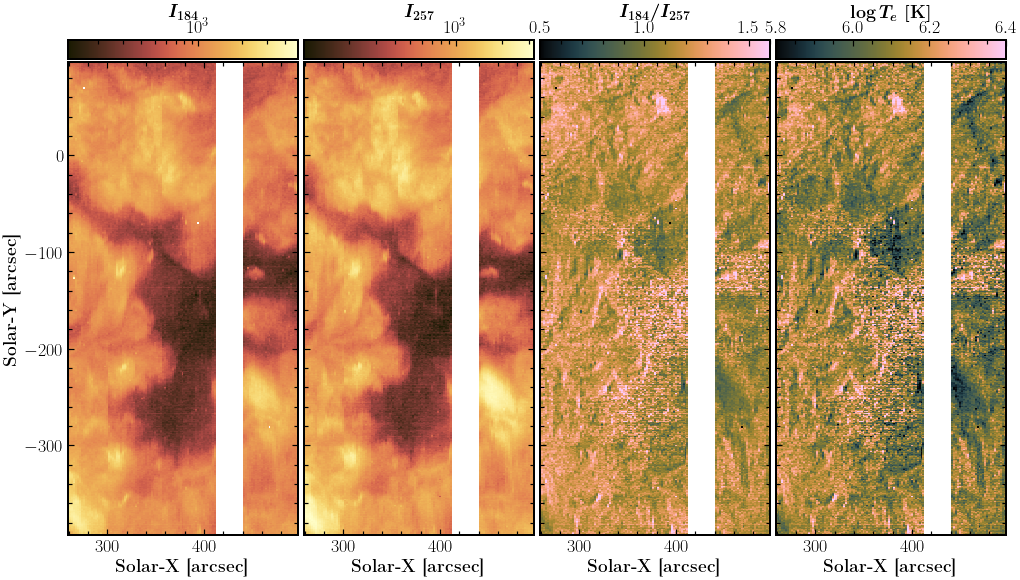

In [166]:
eis_xcoord = np.linspace(495.7 - 236, 495.7, 119)
eis_ycoord = np.linspace(-157 - 235.5, -157 - 235.5 + 489, 490)

fig, axes = plt.subplots(1,4,figsize=(14,10),constrained_layout=True)
im0 = axes[0].pcolormesh(eis_xcoord, eis_ycoord, fe_10_184_fit_merge,cmap=cmcm.lajolla_r,norm=colors.LogNorm(),
                        shading="auto",rasterized=True)
im1 = axes[1].pcolormesh(eis_xcoord, eis_ycoord, fe_10_257_fit_merge,cmap=cmcm.lajolla_r,
                        norm=colors.LogNorm(),
                        shading="auto",rasterized=True)
im2 = axes[2].pcolormesh(eis_xcoord, eis_ycoord, fe_10_184_fit_merge/fe_10_257_fit_merge,cmap=cmcm.batlowK,
                        shading="auto",rasterized=True,vmin=0.5,vmax=1.6)
im3 = axes[3].pcolormesh(eis_xcoord, eis_ycoord, f_FeX_184_257(fe_10_184_fit_merge/fe_10_257_fit_merge),cmap=cmcm.batlowK,
                        shading="auto",rasterized=True,vmin=5.8,vmax=6.4)
imgs = (im0,im1,im2,im3)
titles = (r"$\boldsymbol{I_{184}}$",r"$\boldsymbol{I_{257}}$",r"$\boldsymbol{I_{184}/I_{257}}$",r"$\boldsymbol{\log T_e\ [\mathrm{K}]}$")
for ii, ax_ in enumerate(axes):
    ax_.tick_params(labelsize=18)
    ax_.axis("scaled")
    if (ii != 0):
        ax_.yaxis.set_ticklabels([])
    if ii == 0:
        ax_.set_ylabel(r"\textbf{Solar-Y [arcsec]}",fontsize=18)
    ax_.set_xlabel(r"\textbf{Solar-X [arcsec]}",fontsize=18)
    
    clb_ax = inset_axes(ax_, width="100%",height="40%",bbox_to_anchor=(0.132,1.01,1,0.1),
    bbox_transform=ax_.transAxes,borderpad=3)
    clb = plt.colorbar(imgs[ii],pad=0.05,orientation="horizontal",ax=ax_,cax=clb_ax)
    clb_ax.tick_params(labelsize=18)
    clb_ax.xaxis.tick_top()
    clb_ax.set_xlabel(titles[ii],fontsize=18)
    clb_ax.xaxis.set_label_position("top")
plt.savefig(fname="../figs/184_257_diag.pdf",format="pdf",dpi=300,transparent=False)


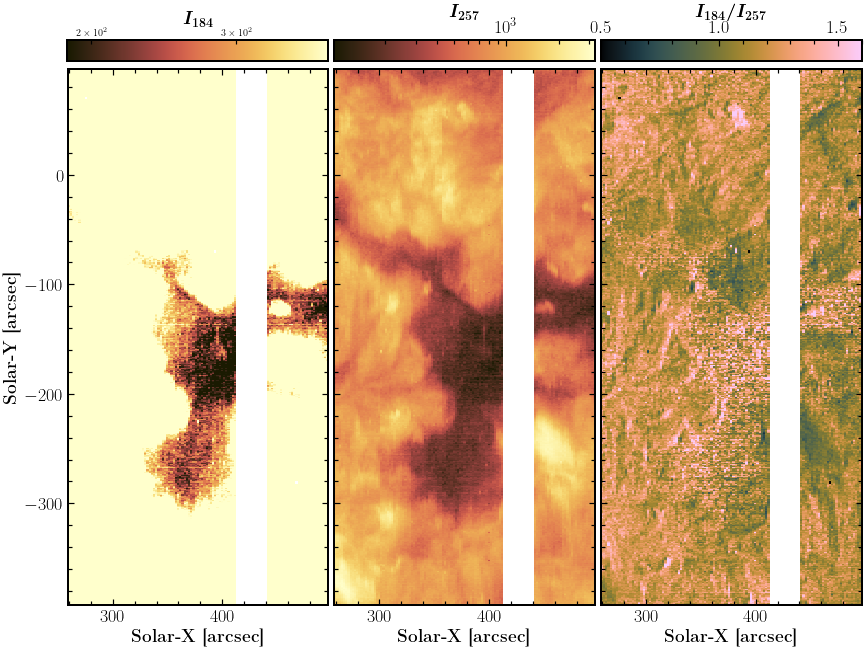

In [17]:
eis_xcoord = np.linspace(495.7 - 236, 495.7, 119)
eis_ycoord = np.linspace(-157 - 235.5, -157 - 235.5 + 489, 490)

fig, axes = plt.subplots(1,3,figsize=(12,10),constrained_layout=True)
im0 = axes[0].pcolormesh(eis_xcoord, eis_ycoord, fe_10_184_fit_merge,cmap=cmcm.lajolla_r,
                        norm=colors.LogNorm(np.nanpercentile(fe_10_184_fit_merge,1),np.nanpercentile(fe_10_184_fit_merge,15)),
                        shading="auto",rasterized=True)
im1 = axes[1].pcolormesh(eis_xcoord, eis_ycoord, fe_10_257_fit_merge,cmap=cmcm.lajolla_r,
                        norm=colors.LogNorm(),
                        shading="auto",rasterized=True)
im2 = axes[2].pcolormesh(eis_xcoord, eis_ycoord, fe_10_184_fit_merge/fe_10_257_fit_merge,cmap=cmcm.batlowK,
                        shading="auto",rasterized=True,vmin=0.5,vmax=1.6)

imgs = (im0,im1,im2)
titles = (r"$\boldsymbol{I_{184}}$",r"$\boldsymbol{I_{257}}$",r"$\boldsymbol{I_{184}/I_{257}}$")
for ii, ax_ in enumerate(axes):
    ax_.tick_params(labelsize=18)
    ax_.axis("scaled")
    if (ii != 0):
        ax_.yaxis.set_ticklabels([])
    if ii == 0:
        ax_.set_ylabel(r"\textbf{Solar-Y [arcsec]}",fontsize=18)
    ax_.set_xlabel(r"\textbf{Solar-X [arcsec]}",fontsize=18)
    
    clb_ax = inset_axes(ax_, width="100%",height="40%",bbox_to_anchor=(0.115,1.01,1,0.1),
    bbox_transform=ax_.transAxes,borderpad=3)
    clb = plt.colorbar(imgs[ii],pad=0.05,orientation="horizontal",ax=ax_,cax=clb_ax)
    clb_ax.tick_params(labelsize=18)
    clb_ax.xaxis.tick_top()
    clb_ax.set_xlabel(titles[ii],fontsize=18)
    clb_ax.xaxis.set_label_position("top")
#plt.savefig(fname="../figs/184_257_test.png",format="png",dpi=300,transparent=False)


In [19]:
mg_7_276_fit_merge, mg_7_276_err_merge = merge_fit(mg_7_276_fit_files,20,radio_cal=1.23)

Reading fit result from, 
   ../save/eis_fit/eis_20070331_113427.mg_07_276_153.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_121143.mg_07_276_153.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_124913.mg_07_276_153.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_132643.mg_07_276_153.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_153013.mg_07_276_153.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_160743.mg_07_276_153.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_164513.mg_07_276_153.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_172243.mg_07_276_153.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_182413.mg_07_276_153.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_190143.mg_07_276_153.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_195513.mg_07_276_153.1c-0.fit.h5

In [20]:
mg_7_280_fit_merge, mg_7_280_err_merge = merge_fit(mg_7_280_fit_files,20,radio_cal=1.33)

Reading fit result from, 
   ../save/eis_fit/eis_20070331_113427.mg_07_280_737.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_121143.mg_07_280_737.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_124913.mg_07_280_737.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_132643.mg_07_280_737.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_153013.mg_07_280_737.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_160743.mg_07_280_737.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_164513.mg_07_280_737.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_172243.mg_07_280_737.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_182413.mg_07_280_737.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_190143.mg_07_280_737.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_195513.mg_07_280_737.1c-0.fit.h5

In [23]:
ratio_data_MgVII_276_280 = pd.read_csv("../chianti_ratio/den_MgVII_276_280.txt",skiprows=6,
                                    names=["dens","ratio"],sep="\s+",index_col=False,dtype=np.float64)
f_MgVII_276_280 = interpolate.interp1d(ratio_data_MgVII_276_280["ratio"].values, ratio_data_MgVII_276_280["dens"].values,
                                    fill_value="extrapolate")

/tmp/ipykernel_402978/2978702633.py:11: RuntimeWarning: divide by zero encountered in true_divide
  im2 = axes[2].pcolormesh(eis_xcoord, eis_ycoord, mg_7_276_fit_merge/mg_7_280_fit_merge,cmap=cmcm.batlowK,
/tmp/ipykernel_402978/2978702633.py:11: RuntimeWarning: invalid value encountered in true_divide
  im2 = axes[2].pcolormesh(eis_xcoord, eis_ycoord, mg_7_276_fit_merge/mg_7_280_fit_merge,cmap=cmcm.batlowK,
/tmp/ipykernel_402978/2978702633.py:14: RuntimeWarning: divide by zero encountered in true_divide
  im3 = axes[3].pcolormesh(eis_xcoord, eis_ycoord, f_MgVII_276_280(mg_7_276_fit_merge/mg_7_280_fit_merge),cmap=cmcm.batlowK,
/tmp/ipykernel_402978/2978702633.py:14: RuntimeWarning: invalid value encountered in true_divide
  im3 = axes[3].pcolormesh(eis_xcoord, eis_ycoord, f_MgVII_276_280(mg_7_276_fit_merge/mg_7_280_fit_merge),cmap=cmcm.batlowK,
/home/yjzhu/anaconda3/lib/python3.8/site-packages/scipy/interpolate/_interpolate.py:641: RuntimeWarning: divide by zero encountered in true_divi

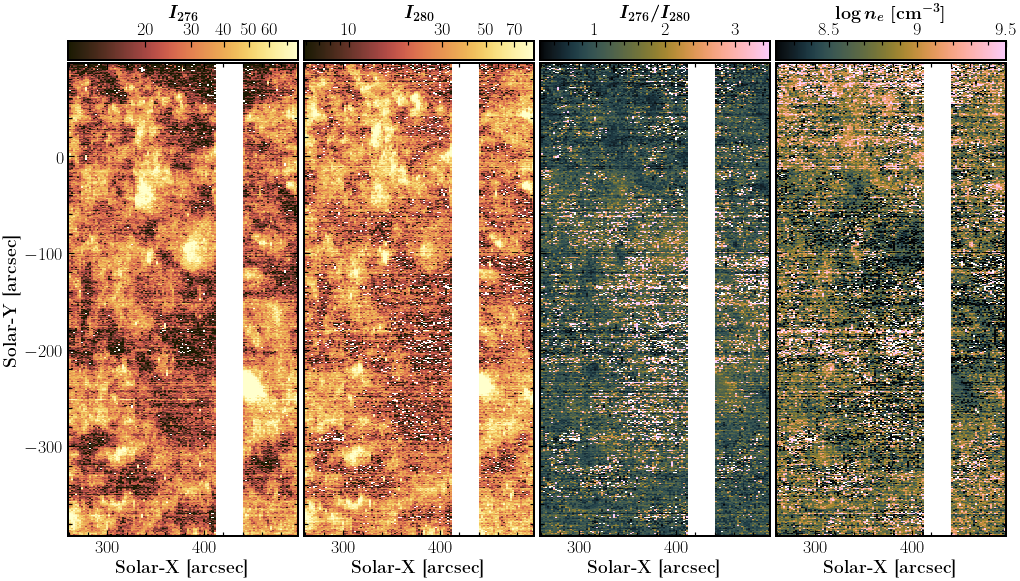

In [174]:
eis_xcoord = np.linspace(495.7 - 236, 495.7, 119)
eis_ycoord = np.linspace(-157 - 235.5, -157 - 235.5 + 489, 490)

fig, axes = plt.subplots(1,4,figsize=(14,10),constrained_layout=True)
im0 = axes[0].pcolormesh(eis_xcoord, eis_ycoord, mg_7_276_fit_merge,cmap=cmcm.lajolla_r,
                        norm=colors.LogNorm(np.nanpercentile(mg_7_276_fit_merge,5),np.nanpercentile(mg_7_276_fit_merge,99)),
                        shading="auto",rasterized=True)
im1 = axes[1].pcolormesh(eis_xcoord, eis_ycoord, mg_7_280_fit_merge,cmap=cmcm.lajolla_r,
                        norm=colors.LogNorm(np.nanpercentile(mg_7_280_fit_merge,5),np.nanpercentile(mg_7_280_fit_merge,99)),
                        shading="auto",rasterized=True)
im2 = axes[2].pcolormesh(eis_xcoord, eis_ycoord, mg_7_276_fit_merge/mg_7_280_fit_merge,cmap=cmcm.batlowK,
                        shading="auto",rasterized=True,vmin=0.2,vmax=3.5)

im3 = axes[3].pcolormesh(eis_xcoord, eis_ycoord, f_MgVII_276_280(mg_7_276_fit_merge/mg_7_280_fit_merge),cmap=cmcm.batlowK,
                        shading="auto",rasterized=True,vmin=8.2,vmax=9.5)

imgs = (im0,im1,im2,im3)
titles = (r"$\boldsymbol{I_{276}}$",r"$\boldsymbol{I_{280}}$",r"$\boldsymbol{I_{276}/I_{280}}$",
            r"$\boldsymbol{\log n_e\ [\mathrm{cm^{-3}}]}$")
for ii, ax_ in enumerate(axes):
    ax_.tick_params(labelsize=18)
    ax_.axis("scaled")
    if (ii != 0):
        ax_.yaxis.set_ticklabels([])
    if ii == 0:
        ax_.set_ylabel(r"\textbf{Solar-Y [arcsec]}",fontsize=18)
    ax_.set_xlabel(r"\textbf{Solar-X [arcsec]}",fontsize=18)
    
    clb_ax = inset_axes(ax_, width="100%",height="40%",bbox_to_anchor=(0.132,1.01,1,0.1),
    bbox_transform=ax_.transAxes,borderpad=3)
    clb = plt.colorbar(imgs[ii],pad=0.05,orientation="horizontal",ax=ax_,cax=clb_ax,
    format=ticker.FuncFormatter(lambda y, _: '{:.16g}'.format(y)))
    clb_ax.tick_params(labelsize=18)
    clb_ax.xaxis.tick_top()
    clb_ax.xaxis.get_offset_text().set_fontsize(18)
    clb_ax.yaxis.get_offset_text().set_fontsize(18)
    clb_ax.set_xlabel(titles[ii],fontsize=18)
    clb_ax.xaxis.set_label_position("top")
    if ii == 0:
        #clb_ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:.16g}'.format(y)))
        clb.set_ticks([20,30,40,50,60])
    if ii == 1:
        clb.set_ticks([10,30,50,70])

plt.savefig(fname="../figs/276_280_diag.pdf",format="pdf",dpi=300,transparent=False)




In [25]:
si_10_258_fit_merge, si_10_258_err_merge = merge_fit(si_10_258_fit_files,19,radio_cal=1.39)

Reading fit result from, 
   ../save/eis_fit/eis_20070331_113427.si_10_258_375.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_121143.si_10_258_375.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_124913.si_10_258_375.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_132643.si_10_258_375.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_153013.si_10_258_375.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_160743.si_10_258_375.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_164513.si_10_258_375.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_172243.si_10_258_375.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_182413.si_10_258_375.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_190143.si_10_258_375.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_195513.si_10_258_375.1c-0.fit.h5

In [26]:
si_10_261_fit_merge, si_10_261_err_merge = merge_fit(si_10_261_fit_files,19,radio_cal=1.326)

Reading fit result from, 
   ../save/eis_fit/eis_20070331_113427.si_10_261_058.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_121143.si_10_261_058.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_124913.si_10_261_058.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_132643.si_10_261_058.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_153013.si_10_261_058.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_160743.si_10_261_058.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_164513.si_10_261_058.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_172243.si_10_261_058.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_182413.si_10_261_058.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_190143.si_10_261_058.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_195513.si_10_261_058.1c-0.fit.h5

In [27]:
ratio_data_SiX_258_261 = pd.read_csv("../chianti_ratio/den_SiX_258_261.txt",skiprows=6,
                                    names=["dens","ratio"],sep="\s+",index_col=False,dtype=np.float64)
f_SiX_258_261 = interpolate.interp1d(ratio_data_SiX_258_261["ratio"].values, ratio_data_SiX_258_261["dens"].values,
                                    fill_value="extrapolate")

/tmp/ipykernel_402978/2824279259.py:11: RuntimeWarning: divide by zero encountered in true_divide
  im2 = axes[2].pcolormesh(eis_xcoord, eis_ycoord, si_10_258_fit_merge/si_10_261_fit_merge,cmap=cmcm.batlowK,
/tmp/ipykernel_402978/2824279259.py:14: RuntimeWarning: divide by zero encountered in true_divide
  im3 = axes[3].pcolormesh(eis_xcoord, eis_ycoord, f_SiX_258_261(si_10_258_fit_merge/si_10_261_fit_merge),cmap=cmcm.batlowK,


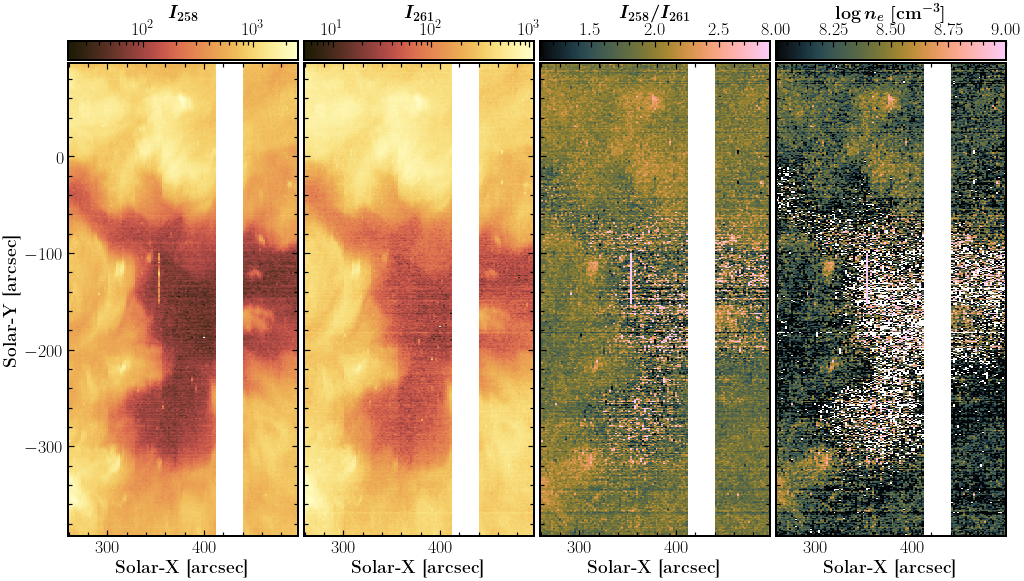

In [169]:
eis_xcoord = np.linspace(495.7 - 236, 495.7, 119)
eis_ycoord = np.linspace(-157 - 235.5, -157 - 235.5 + 489, 490)

fig, axes = plt.subplots(1,4,figsize=(14,10),constrained_layout=True)
im0 = axes[0].pcolormesh(eis_xcoord, eis_ycoord, si_10_258_fit_merge,cmap=cmcm.lajolla_r,
                        norm=colors.LogNorm(),
                        shading="auto",rasterized=True)
im1 = axes[1].pcolormesh(eis_xcoord, eis_ycoord, si_10_261_fit_merge,cmap=cmcm.lajolla_r,
                        norm=colors.LogNorm(),
                        shading="auto",rasterized=True)
im2 = axes[2].pcolormesh(eis_xcoord, eis_ycoord, si_10_258_fit_merge/si_10_261_fit_merge,cmap=cmcm.batlowK,
                        shading="auto",rasterized=True,vmin=1.1,vmax=2.9)

im3 = axes[3].pcolormesh(eis_xcoord, eis_ycoord, f_SiX_258_261(si_10_258_fit_merge/si_10_261_fit_merge),cmap=cmcm.batlowK,
                        shading="auto",rasterized=True,vmin=8,vmax=9)

imgs = (im0,im1,im2,im3)
titles = (r"$\boldsymbol{I_{258}}$",r"$\boldsymbol{I_{261}}$",r"$\boldsymbol{I_{258}/I_{261}}$",
            r"$\boldsymbol{\log n_e\ [\mathrm{cm^{-3}}]}$")
for ii, ax_ in enumerate(axes):
    ax_.tick_params(labelsize=18)
    ax_.axis("scaled")
    if (ii != 0):
        ax_.yaxis.set_ticklabels([])
    if ii == 0:
        ax_.set_ylabel(r"\textbf{Solar-Y [arcsec]}",fontsize=18)
    ax_.set_xlabel(r"\textbf{Solar-X [arcsec]}",fontsize=18)
    
    clb_ax = inset_axes(ax_, width="100%",height="40%",bbox_to_anchor=(0.132,1.01,1,0.1),
    bbox_transform=ax_.transAxes,borderpad=3)
    clb = plt.colorbar(imgs[ii],pad=0.05,orientation="horizontal",ax=ax_,cax=clb_ax)
    clb_ax.tick_params(labelsize=18)
    clb_ax.xaxis.tick_top()
    clb_ax.set_xlabel(titles[ii],fontsize=18)
    clb_ax.xaxis.set_label_position("top")
plt.savefig(fname="../figs/258_261_diag.pdf",format="pdf",dpi=300,transparent=False)


In [37]:
fe_8_185_fit_merge, fe_8_185_err_merge = merge_fit(fe_8_185_fit_files,1,radio_cal=1.35)

Reading fit result from, 
   ../save/eis_fit/eis_20070331_113427.fe_08_185_213.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_121143.fe_08_185_213.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_124913.fe_08_185_213.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_132643.fe_08_185_213.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_153013.fe_08_185_213.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_160743.fe_08_185_213.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_164513.fe_08_185_213.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_172243.fe_08_185_213.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_182413.fe_08_185_213.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_190143.fe_08_185_213.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_195513.fe_08_185_213.1c-0.fit.h5

In [38]:
fe_8_186_fit_merge, fe_8_186_err_merge = merge_fit(fe_8_186_fit_files,1,radio_cal=1.39)

Reading fit result from, 
   ../save/eis_fit/eis_20070331_113427.fe_08_186_601.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_121143.fe_08_186_601.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_124913.fe_08_186_601.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_132643.fe_08_186_601.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_153013.fe_08_186_601.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_160743.fe_08_186_601.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_164513.fe_08_186_601.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_172243.fe_08_186_601.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_182413.fe_08_186_601.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_190143.fe_08_186_601.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_195513.fe_08_186_601.1c-0.fit.h5

/tmp/ipykernel_402978/2475070268.py:11: RuntimeWarning: divide by zero encountered in true_divide
  im2 = axes[2].pcolormesh(eis_xcoord, eis_ycoord, fe_8_185_fit_merge/fe_8_186_fit_merge,cmap=cmcm.batlowK,


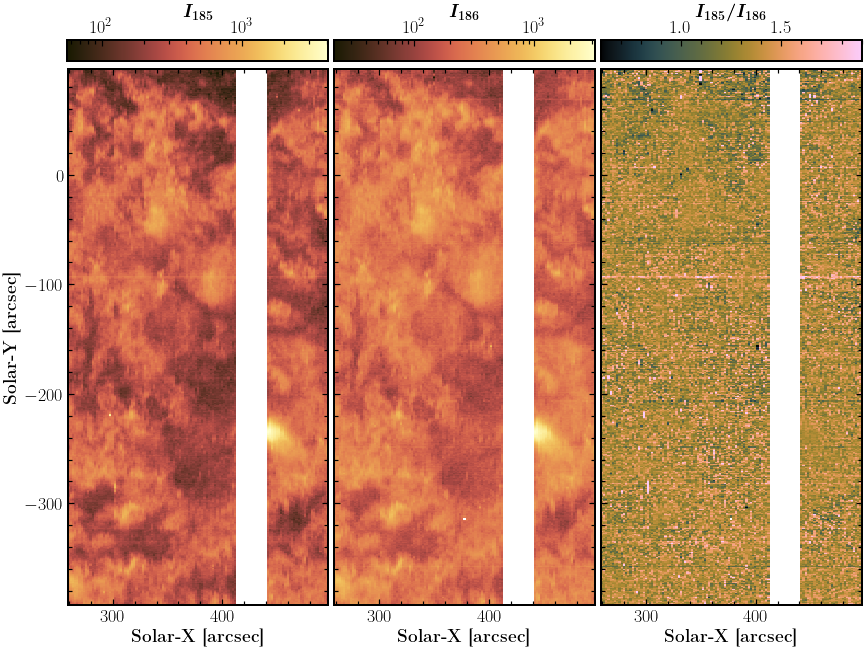

In [170]:
eis_xcoord = np.linspace(495.7 - 236, 495.7, 119)
eis_ycoord = np.linspace(-157 - 235.5, -157 - 235.5 + 489, 490)

fig, axes = plt.subplots(1,3,figsize=(12,10),constrained_layout=True)
im0 = axes[0].pcolormesh(eis_xcoord, eis_ycoord, fe_8_185_fit_merge,cmap=cmcm.lajolla_r,
                        norm=colors.LogNorm(),
                        shading="auto",rasterized=True)
im1 = axes[1].pcolormesh(eis_xcoord, eis_ycoord, fe_8_186_fit_merge,cmap=cmcm.lajolla_r,
                        norm=colors.LogNorm(),
                        shading="auto",rasterized=True)
im2 = axes[2].pcolormesh(eis_xcoord, eis_ycoord, fe_8_185_fit_merge/fe_8_186_fit_merge,cmap=cmcm.batlowK,
                        shading="auto",rasterized=True,vmin=0.6,vmax=1.9)

imgs = (im0,im1,im2)
titles = (r"$\boldsymbol{I_{185}}$",r"$\boldsymbol{I_{186}}$",r"$\boldsymbol{I_{185}/I_{186}}$")
for ii, ax_ in enumerate(axes):
    ax_.tick_params(labelsize=18)
    ax_.axis("scaled")
    if (ii != 0):
        ax_.yaxis.set_ticklabels([])
    if ii == 0:
        ax_.set_ylabel(r"\textbf{Solar-Y [arcsec]}",fontsize=18)
    ax_.set_xlabel(r"\textbf{Solar-X [arcsec]}",fontsize=18)
    
    clb_ax = inset_axes(ax_, width="100%",height="40%",bbox_to_anchor=(0.115,1.01,1,0.1),
    bbox_transform=ax_.transAxes,borderpad=3)
    clb = plt.colorbar(imgs[ii],pad=0.05,orientation="horizontal",ax=ax_,cax=clb_ax)
    clb_ax.tick_params(labelsize=18)
    clb_ax.xaxis.tick_top()
    clb_ax.set_xlabel(titles[ii],fontsize=18)
    clb_ax.xaxis.set_label_position("top")
plt.savefig(fname="../figs/185_186_diag.pdf",format="pdf",dpi=300,transparent=False)


In [54]:
he_2_256_fit_merge, he_2_256_err_merge = merge_fit(he_2_256_fit_files,18)

Reading fit result from, 
   ../save/eis_fit/eis_20070331_113427.he_02_256_317.2c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_121143.he_02_256_317.2c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_124913.he_02_256_317.2c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_132643.he_02_256_317.2c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_153013.he_02_256_317.2c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_160743.he_02_256_317.2c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_164513.he_02_256_317.2c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_172243.he_02_256_317.2c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_182413.he_02_256_317.2c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_190143.he_02_256_317.2c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_195513.he_02_256_317.2c-0.fit.h5

In [55]:
o_6_184_fit_merge, o_6_184_err_merge = merge_fit(o_6_184_fit_files,1)

Reading fit result from, 
   ../save/eis_fit/eis_20070331_113427.o__06_184_117.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_121143.o__06_184_117.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_124913.o__06_184_117.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_132643.o__06_184_117.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_153013.o__06_184_117.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_160743.o__06_184_117.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_164513.o__06_184_117.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_172243.o__06_184_117.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_182413.o__06_184_117.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_190143.o__06_184_117.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_195513.o__06_184_117.1c-0.fit.h5

In [58]:
fe_9_197_fit_merge, fe_9_197_err_merge = merge_fit(fe_9_197_fit_files,3)

Reading fit result from, 
   ../save/eis_fit/eis_20070331_113427.fe_09_197_862.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_121143.fe_09_197_862.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_124913.fe_09_197_862.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_132643.fe_09_197_862.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_153013.fe_09_197_862.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_160743.fe_09_197_862.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_164513.fe_09_197_862.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_172243.fe_09_197_862.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_182413.fe_09_197_862.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_190143.fe_09_197_862.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_195513.fe_09_197_862.1c-0.fit.h5

In [56]:
fe_11_188_fit_merge, fe_11_188_err_merge = merge_fit(fe_11_188_fit_files,1)

Reading fit result from, 
   ../save/eis_fit/eis_20070331_113427.fe_11_188_216.2c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_121143.fe_11_188_216.2c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_124913.fe_11_188_216.2c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_132643.fe_11_188_216.2c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_153013.fe_11_188_216.2c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_160743.fe_11_188_216.2c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_164513.fe_11_188_216.2c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_172243.fe_11_188_216.2c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_182413.fe_11_188_216.2c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_190143.fe_11_188_216.2c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_195513.fe_11_188_216.2c-0.fit.h5

In [65]:
fe_12_195_fit_merge, fe_12_195_err_merge = merge_fit(fe_12_195_fit_files,2)

Reading fit result from, 
   ../save/eis_fit/eis_20070331_113427.fe_12_195_119.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_121143.fe_12_195_119.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_124913.fe_12_195_119.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_132643.fe_12_195_119.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_153013.fe_12_195_119.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_160743.fe_12_195_119.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_164513.fe_12_195_119.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_172243.fe_12_195_119.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_182413.fe_12_195_119.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_190143.fe_12_195_119.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_195513.fe_12_195_119.1c-0.fit.h5

In [59]:
fe_13_202_fit_merge, fe_13_202_err_merge = merge_fit(fe_13_202_fit_files,3)

Reading fit result from, 
   ../save/eis_fit/eis_20070331_113427.fe_13_202_044.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_121143.fe_13_202_044.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_124913.fe_13_202_044.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_132643.fe_13_202_044.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_153013.fe_13_202_044.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_160743.fe_13_202_044.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_164513.fe_13_202_044.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_172243.fe_13_202_044.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_182413.fe_13_202_044.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_190143.fe_13_202_044.1c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_195513.fe_13_202_044.1c-0.fit.h5

In [61]:
fe_14_270_fit_merge, fe_14_270_err_merge = merge_fit(fe_14_270_fit_files,20,component=1)

Reading fit result from, 
   ../save/eis_fit/eis_20070331_113427.fe_14_270_519.2c-1.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_121143.fe_14_270_519.2c-1.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_124913.fe_14_270_519.2c-1.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_132643.fe_14_270_519.2c-1.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_153013.fe_14_270_519.2c-1.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_160743.fe_14_270_519.2c-1.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_164513.fe_14_270_519.2c-1.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_172243.fe_14_270_519.2c-1.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_182413.fe_14_270_519.2c-1.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_190143.fe_14_270_519.2c-1.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_195513.fe_14_270_519.2c-1.fit.h5

In [62]:
fe_15_284_fit_merge, fe_15_284_err_merge = merge_fit(fe_15_284_fit_files,20,component=1)

Reading fit result from, 
   ../save/eis_fit/eis_20070331_113427.fe_15_284_160.2c-1.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_121143.fe_15_284_160.2c-1.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_124913.fe_15_284_160.2c-1.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_132643.fe_15_284_160.2c-1.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_153013.fe_15_284_160.2c-1.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_160743.fe_15_284_160.2c-1.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_164513.fe_15_284_160.2c-1.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_172243.fe_15_284_160.2c-1.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_182413.fe_15_284_160.2c-1.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_190143.fe_15_284_160.2c-1.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_195513.fe_15_284_160.2c-1.fit.h5

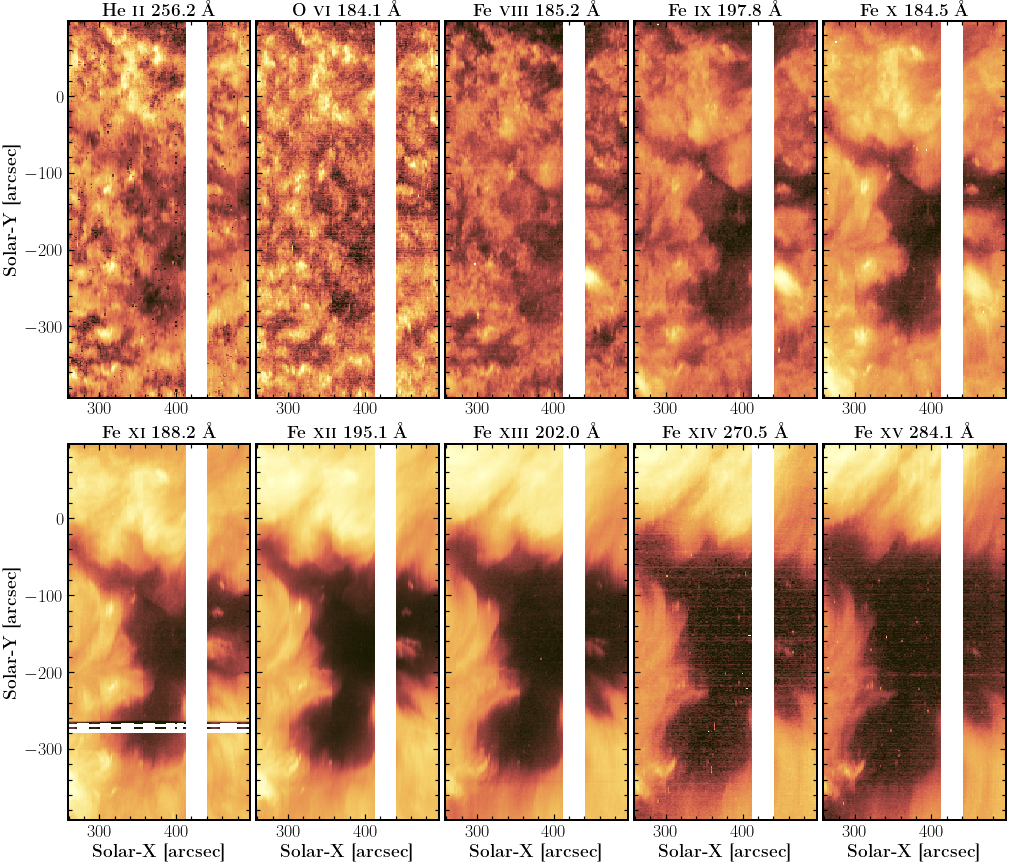

In [124]:
fig, axes = plt.subplots(2,5,figsize=(14,12),constrained_layout=True)

axes[0,0].pcolormesh(eis_xcoord, eis_ycoord, he_2_256_fit_merge,cmap=cmcm.lajolla_r,
norm=colors.LogNorm(vmin=np.nanpercentile(he_2_256_fit_merge,0.1),vmax=np.nanpercentile(he_2_256_fit_merge,99.9)),
shading="auto",rasterized=True)
axes[0,1].pcolormesh(eis_xcoord, eis_ycoord, o_6_184_fit_merge,cmap=cmcm.lajolla_r,
norm=colors.LogNorm(vmin=np.nanpercentile(o_6_184_fit_merge,0.1),vmax=np.nanpercentile(o_6_184_fit_merge,99.9)),
shading="auto",rasterized=True)
axes[0,2].pcolormesh(eis_xcoord, eis_ycoord, fe_8_185_fit_merge,cmap=cmcm.lajolla_r,
norm=colors.LogNorm(vmin=np.nanpercentile(fe_8_185_fit_merge,0.1),vmax=np.nanpercentile(fe_8_185_fit_merge,99.9)),
shading="auto",rasterized=True)
axes[0,3].pcolormesh(eis_xcoord, eis_ycoord, fe_9_197_fit_merge,cmap=cmcm.lajolla_r,
norm=colors.LogNorm(vmin=np.nanpercentile(fe_9_197_fit_merge,0.1),vmax=np.nanpercentile(fe_9_197_fit_merge,99.9)),
shading="auto",rasterized=True)
axes[0,4].pcolormesh(eis_xcoord, eis_ycoord, fe_10_184_fit_merge,cmap=cmcm.lajolla_r,
norm=colors.LogNorm(vmin=np.nanpercentile(fe_10_184_fit_merge,0.1),vmax=np.nanpercentile(fe_10_184_fit_merge,99.9)),
shading="auto",rasterized=True)
axes[1,0].pcolormesh(eis_xcoord, eis_ycoord, fe_11_188_fit_merge,cmap=cmcm.lajolla_r,
norm=colors.LogNorm(vmin=np.nanpercentile(fe_11_188_fit_merge,2.5),vmax=np.nanpercentile(fe_11_188_fit_merge,99.9)),
shading="auto",rasterized=True)
axes[1,1].pcolormesh(eis_xcoord, eis_ycoord, fe_12_195_err_merge,cmap=cmcm.lajolla_r,
norm=colors.LogNorm(vmin=np.nanpercentile(fe_12_195_fit_merge,0.1),vmax=np.nanpercentile(fe_12_195_fit_merge,99.9)),
shading="auto",rasterized=True)
axes[1,2].pcolormesh(eis_xcoord, eis_ycoord, fe_13_202_fit_merge,cmap=cmcm.lajolla_r,
norm=colors.LogNorm(vmin=np.nanpercentile(fe_13_202_fit_merge,0.1),vmax=np.nanpercentile(fe_13_202_fit_merge,99.9)),
shading="auto",rasterized=True)
axes[1,3].pcolormesh(eis_xcoord, eis_ycoord, fe_14_270_fit_merge,cmap=cmcm.lajolla_r,
norm=colors.LogNorm(vmin=np.nanpercentile(fe_14_270_fit_merge,2.5),vmax=np.nanpercentile(fe_14_270_fit_merge,99.9)),
shading="auto",rasterized=True)
axes[1,4].pcolormesh(eis_xcoord, eis_ycoord, fe_15_284_err_merge,cmap=cmcm.lajolla_r,
norm=colors.LogNorm(vmin=np.nanpercentile(fe_15_284_fit_merge,2),vmax=np.nanpercentile(fe_15_284_fit_merge,99.9)),
shading="auto",rasterized=True)

titles = [r"\textbf{He \textsc{ii} 256.2 \mbox{\AA}}",r"\textbf{O \textsc{vi} 184.1 \mbox{\AA}}",
            r"\textbf{Fe \textsc{viii} 185.2 \mbox{\AA}}",r"\textbf{Fe \textsc{ix} 197.8 \mbox{\AA}}",
            r"\textbf{Fe \textsc{x} 184.5 \mbox{\AA}}",r"\textbf{Fe \textsc{xi} 188.2 \mbox{\AA}}",
            r"\textbf{Fe \textsc{xii} 195.1 \mbox{\AA}}",r"\textbf{Fe \textsc{xiii} 202.0 \mbox{\AA}}",
            r"\textbf{Fe \textsc{xiv} 270.5 \mbox{\AA}}",r"\textbf{Fe \textsc{xv} 284.1 \mbox{\AA}}"]
Tmaxs = [r"$\log T_{\rm max} \sim 4.9$",r"$\log T_{\rm max} \sim 4.9$",r"$\log T_{\rm max} \sim 4.9$",
        r"$\log T_{\rm max} \sim 4.9$",r"$\log T_{\rm max} \sim 4.9$",r"$\log T_{\rm max} \sim 4.9$",
        r"$\log T_{\rm max} \sim 4.9$",r"$\log T_{\rm max} \sim 4.9$",r"$\log T_{\rm max} \sim 4.9$",
        r"$\log T_{\rm max} \sim 4.9$"]

for ii, ax_ in enumerate(axes.flatten()):
    if (ii != 0) and (ii != 5):
        ax_.yaxis.set_ticklabels([])
    if (ii == 0) or (ii == 5):
        ax_.set_ylabel(r"\textbf{Solar-Y [arcsec]}",fontsize=18)
    if (ii >= 5):
        ax_.set_xlabel(r"\textbf{Solar-X [arcsec]}",fontsize=18)

        
    ax_.set_title(titles[ii],fontsize=18)
    ax_.tick_params(labelsize=18)
    ax_.axis("scaled")
    #ax_.text(0.02,0.99,Tmaxs[ii],fontsize=18,color="white",va="top",ha="left",transform=ax_.transAxes)
    ax_.xaxis.set_minor_locator(ticker.AutoMinorLocator(5))
    ax_.yaxis.set_minor_locator(ticker.AutoMinorLocator(5))
    ax_.tick_params(which="major",width=1.2,length=6)
    ax_.tick_params(which="minor",width=1.2,length=4)
    
plt.savefig(fname="../figs/eis_summary.pdf",format="pdf",transparent=False)

In [110]:
def merge_10_panel(filenames_list,start_pix,component,paraname="vel"):
    fit_merge = np.zeros((490,119,10))
    for jj, ion_name in enumerate(filenames_list):
        for ii, filename in enumerate(ion_name):
            load_fit = eispac.read_fit(filename,verbose=False)
            fit_vel = load_fit.fit[paraname][:,:,component[jj]]

            if ii < 4:
                fit_merge[:,119-7*(ii+1):119-7*ii,jj] = fit_vel[22 - start_pix[jj]: 512-start_pix[jj],:]
            else:
                fit_merge[:,119-7*(ii+3):119-7*(ii+2),jj] = fit_vel[22 - start_pix[jj]: 512-start_pix[jj],:]

    fit_merge[:,-42:-28,:] = np.nan
    return fit_merge

In [127]:
filenames_10_panel = [he_2_256_fit_files, o_6_184_fit_files, fe_8_185_fit_files, fe_9_197_fit_files,
fe_10_184_fit_files,fe_11_188_fit_files, fe_12_195_fit_files, fe_13_202_fit_files,
fe_14_270_fit_files, fe_15_284_fit_files]
start_pix_10_panel = [18, 1, 1, 3, 1, 1, 2, 3, 20,20]
component_10_panel = [0,0,0,0,0,0,0,0,1,1]

merge_vel = merge_10_panel(filenames_10_panel, start_pix_10_panel, component_10_panel)

Reading fit result from, 
   ../save/eis_fit/eis_20070331_113427.he_02_256_317.2c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_121143.he_02_256_317.2c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_124913.he_02_256_317.2c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_132643.he_02_256_317.2c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_153013.he_02_256_317.2c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_160743.he_02_256_317.2c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_164513.he_02_256_317.2c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_172243.he_02_256_317.2c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_182413.he_02_256_317.2c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_190143.he_02_256_317.2c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_195513.he_02_256_317.2c-0.fit.h5

In [128]:
merge_int = merge_10_panel(filenames_10_panel, start_pix_10_panel, component_10_panel,paraname="int")

Reading fit result from, 
   ../save/eis_fit/eis_20070331_113427.he_02_256_317.2c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_121143.he_02_256_317.2c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_124913.he_02_256_317.2c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_132643.he_02_256_317.2c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_153013.he_02_256_317.2c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_160743.he_02_256_317.2c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_164513.he_02_256_317.2c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_172243.he_02_256_317.2c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_182413.he_02_256_317.2c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_190143.he_02_256_317.2c-0.fit.h5
Reading fit result from, 
   ../save/eis_fit/eis_20070331_195513.he_02_256_317.2c-0.fit.h5

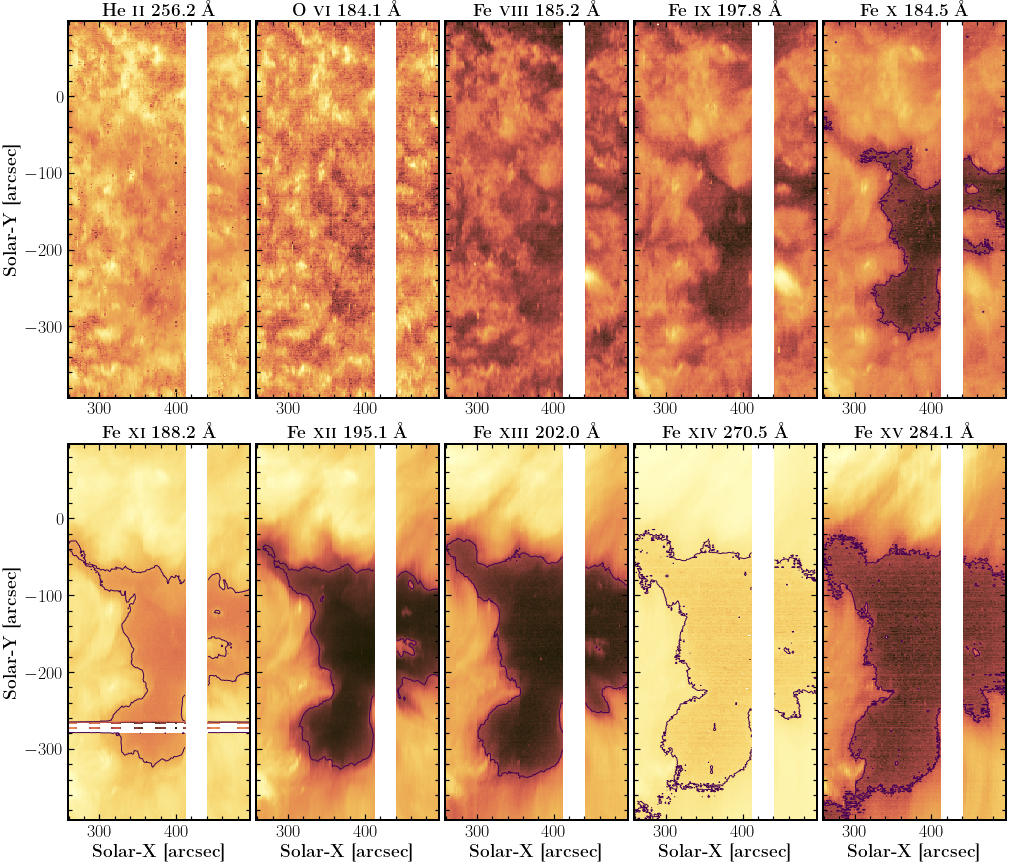

In [163]:
fig, axes = plt.subplots(2,5,figsize=(14,12),constrained_layout=True)

titles = [r"\textbf{He \textsc{ii} 256.2 \mbox{\AA}}",r"\textbf{O \textsc{vi} 184.1 \mbox{\AA}}",
            r"\textbf{Fe \textsc{viii} 185.2 \mbox{\AA}}",r"\textbf{Fe \textsc{ix} 197.8 \mbox{\AA}}",
            r"\textbf{Fe \textsc{x} 184.5 \mbox{\AA}}",r"\textbf{Fe \textsc{xi} 188.2 \mbox{\AA}}",
            r"\textbf{Fe \textsc{xii} 195.1 \mbox{\AA}}",r"\textbf{Fe \textsc{xiii} 202.0 \mbox{\AA}}",
            r"\textbf{Fe \textsc{xiv} 270.5 \mbox{\AA}}",r"\textbf{Fe \textsc{xv} 284.1 \mbox{\AA}}"]
Tmaxs = [r"$\log T_{\rm max} \sim 4.9$",r"$\log T_{\rm max} \sim 4.9$",r"$\log T_{\rm max} \sim 4.9$",
        r"$\log T_{\rm max} \sim 4.9$",r"$\log T_{\rm max} \sim 4.9$",r"$\log T_{\rm max} \sim 4.9$",
        r"$\log T_{\rm max} \sim 4.9$",r"$\log T_{\rm max} \sim 4.9$",r"$\log T_{\rm max} \sim 4.9$",
        r"$\log T_{\rm max} \sim 4.9$"]

ch_level = [0,0,0,0,25,40,50,40,3,10]
for ii, ax_ in enumerate(axes.flatten()):
    im = ax_.pcolormesh(eis_xcoord, eis_ycoord, merge_int[:,:,ii],cmap=cmcm.lajolla_r,
        shading="auto",rasterized=True,norm=colors.LogNorm())

    if (ii != 0) and (ii != 5):
        ax_.yaxis.set_ticklabels([])
    if (ii == 0) or (ii == 5):
        ax_.set_ylabel(r"\textbf{Solar-Y [arcsec]}",fontsize=18)
    if (ii >= 5):
        ax_.set_xlabel(r"\textbf{Solar-X [arcsec]}",fontsize=18)

    if (ii > 3):
        ax_.contour(eis_xcoord, eis_ycoord, merge_int[:,:,ii], levels=[ch_level[ii]])


        
    ax_.set_title(titles[ii],fontsize=18)
    ax_.tick_params(labelsize=18)
    ax_.axis("scaled")
    #ax_.text(0.02,0.99,Tmaxs[ii],fontsize=18,color="white",va="top",ha="left",transform=ax_.transAxes)
    ax_.xaxis.set_minor_locator(ticker.AutoMinorLocator(5))
    ax_.yaxis.set_minor_locator(ticker.AutoMinorLocator(5))
    ax_.tick_params(which="major",width=1.2,length=6)
    ax_.tick_params(which="minor",width=1.2,length=4)

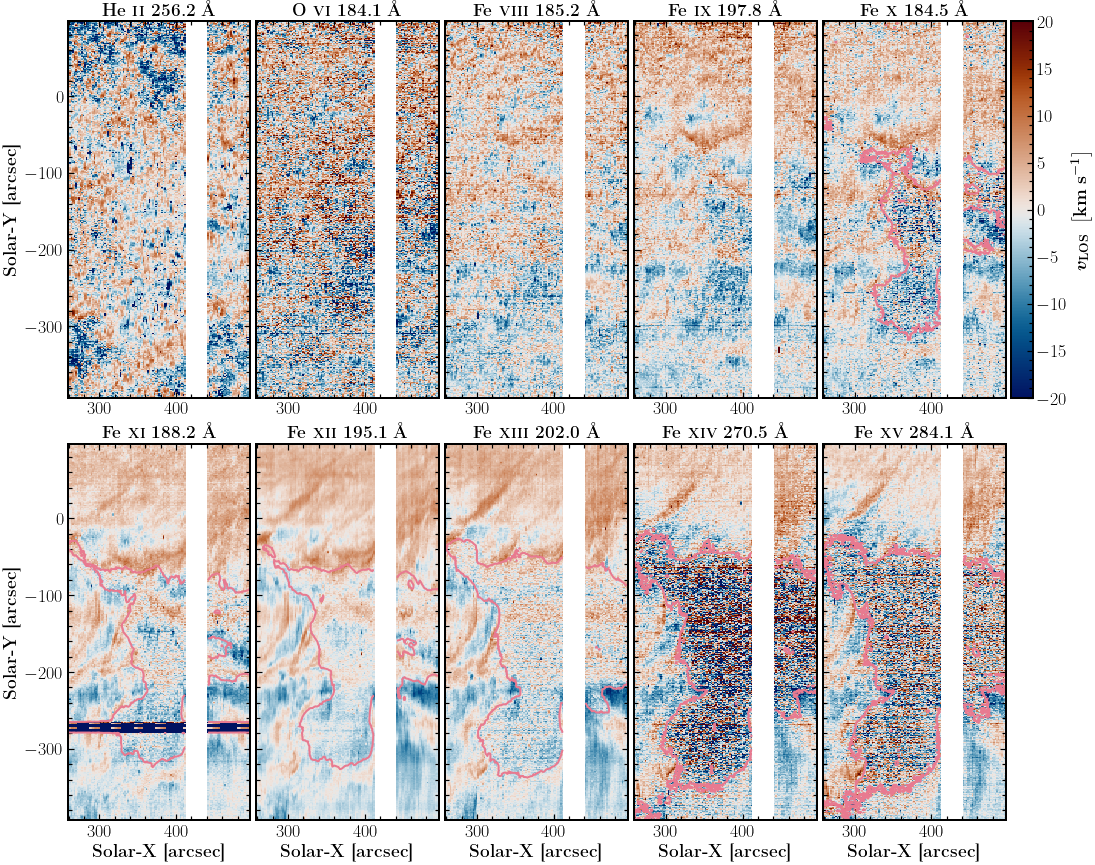

In [165]:
fig, axes = plt.subplots(2,5,figsize=(14,12),constrained_layout=True)

titles = [r"\textbf{He \textsc{ii} 256.2 \mbox{\AA}}",r"\textbf{O \textsc{vi} 184.1 \mbox{\AA}}",
            r"\textbf{Fe \textsc{viii} 185.2 \mbox{\AA}}",r"\textbf{Fe \textsc{ix} 197.8 \mbox{\AA}}",
            r"\textbf{Fe \textsc{x} 184.5 \mbox{\AA}}",r"\textbf{Fe \textsc{xi} 188.2 \mbox{\AA}}",
            r"\textbf{Fe \textsc{xii} 195.1 \mbox{\AA}}",r"\textbf{Fe \textsc{xiii} 202.0 \mbox{\AA}}",
            r"\textbf{Fe \textsc{xiv} 270.5 \mbox{\AA}}",r"\textbf{Fe \textsc{xv} 284.1 \mbox{\AA}}"]
Tmaxs = [r"$\log T_{\rm max} \sim 4.9$",r"$\log T_{\rm max} \sim 4.9$",r"$\log T_{\rm max} \sim 4.9$",
        r"$\log T_{\rm max} \sim 4.9$",r"$\log T_{\rm max} \sim 4.9$",r"$\log T_{\rm max} \sim 4.9$",
        r"$\log T_{\rm max} \sim 4.9$",r"$\log T_{\rm max} \sim 4.9$",r"$\log T_{\rm max} \sim 4.9$",
        r"$\log T_{\rm max} \sim 4.9$"]

for ii, ax_ in enumerate(axes.flatten()):
    im = ax_.pcolormesh(eis_xcoord, eis_ycoord, merge_vel[:,:,ii],cmap=cmcm.vik,vmin=-20,vmax=20,
        shading="auto",rasterized=True)

    if (ii != 0) and (ii != 5):
        ax_.yaxis.set_ticklabels([])
    if (ii == 0) or (ii == 5):
        ax_.set_ylabel(r"\textbf{Solar-Y [arcsec]}",fontsize=18)
    if (ii >= 5):
        ax_.set_xlabel(r"\textbf{Solar-X [arcsec]}",fontsize=18)

    if ii == 4:
            clb_ax = inset_axes(ax_, width="100%",height="100%",bbox_to_anchor=(1.03,0,0.12,1),
            bbox_transform=ax_.transAxes,borderpad=0)
            clb = plt.colorbar(im,pad=0.05,orientation="vertical",ax=ax_,cax=clb_ax)
            clb_ax.tick_params(labelsize=18)
            clb_ax.yaxis.tick_right()
            clb_ax.set_ylabel(r"$\boldsymbol{v_{\rm LOS}\ \left[\mathrm{km\ s^{-1}}\right]}$",fontsize=18)
            clb_ax.xaxis.set_label_position("top")

    if (ii > 3):
        ax_.contour(eis_xcoord, eis_ycoord, merge_int[:,:,ii], levels=[ch_level[ii]],colors=["#E87A90"],linewidths=2)
    ax_.set_title(titles[ii],fontsize=18)
    ax_.tick_params(labelsize=18)
    ax_.axis("scaled")
    #ax_.text(0.02,0.99,Tmaxs[ii],fontsize=18,color="white",va="top",ha="left",transform=ax_.transAxes)
    ax_.xaxis.set_minor_locator(ticker.AutoMinorLocator(5))
    ax_.yaxis.set_minor_locator(ticker.AutoMinorLocator(5))
    ax_.tick_params(which="major",width=1.2,length=6)
    ax_.tick_params(which="minor",width=1.2,length=4)
    
plt.savefig(fname="../figs/eis_vLOS.pdf",format="pdf",transparent=False)

In [ ]:
plt.hist(fe_10_257_fit_merge.flatten(),bins=np.arange(0,200,10))

In [ ]:
plt.hist(fe_10_184_fit_merge.flatten(),bins=np.arange(0,500,10))

In [105]:
load_fit = eispac.read_fit(fe_10_257_fit_files[4])
vel, vel_err = load_fit.get_params(component=1,param_name="vel")
vel

Reading fit result from, 
   ../save/eis_fit/eis_20070331_153013.fe_10_257_262.4c-1.fit.h5


array([], shape=(512, 7, 0), dtype=float64)

In [ ]:
load_fit = eispac.read_fit(fe_10_257_fit_files[4])
fit_x, fit_y = load_fit.get_fit_profile(coords=[20,3],num_wavelengths=200)
plt.plot(fit_x,fit_y)


In [ ]:
load_fit = eispac.read_fit(fe_10_257_fit_files[4])
fit_x, fit_y = load_fit.get_fit_profile(coords=[250,3],num_wavelengths=200)
plt.plot(fit_x,fit_y)

In [ ]:
load_fit = eispac.read_fit(fe_10_184_fit_files[4])
fit_x, fit_y = load_fit.get_fit_profile(coords=[20,3],num_wavelengths=200)
plt.plot(fit_x,fit_y)